程式4-1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 128
BATCH_SIZE = 32

# 載入 CIFAR-10 資料集
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images,
    test_labels) = cifar_dataset.load_data()

# 將資料集做標準化處理
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
print('mean: ', mean)
print('stddev: ', stddev)

# 將標籤轉換為 one-hot 格式
train_labels = to_categorical(train_labels,
                              num_classes=10)
test_labels = to_categorical(test_labels,
                             num_classes=10)


mean:  120.70756512369792
stddev:  64.1500758911213


In [5]:
train_images.shape

(50000, 32, 32, 3)

程式4-2

In [6]:
# 在模型中加入雙卷積層與一密集層
model = Sequential()
model.add(Conv2D(64, (5, 5), strides=(2,2),
                 activation='relu',
                 input_shape=(32, 32, 3),
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Conv2D(64, (3, 3), strides=(2,2),
                 activation='relu', padding='same',
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Flatten())
model.add(Dense(10, activation='softmax',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics =['accuracy'])
model.summary()


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          31,370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,162 (285.79 KB)

 Trainable params: 73,162 (285.79 KB)

 Non-trainable params: 0 (0.00 B)

程式4-3

In [7]:
history = model.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS,
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)


Epoch 1/128
1563/1563 - 7s - 4ms/step - accuracy: 0.4930 - loss: 1.4385 - val_accuracy: 0.5833 - val_loss: 1.1802
Epoch 2/128
1563/1563 - 5s - 3ms/step - accuracy: 0.6187 - loss: 1.0923 - val_accuracy: 0.6229 - val_loss: 1.0959
Epoch 3/128
1563/1563 - 5s - 3ms/step - accuracy: 0.6712 - loss: 0.9485 - val_accuracy: 0.6419 - val_loss: 1.0460
Epoch 4/128
1563/1563 - 5s - 3ms/step - accuracy: 0.7065 - loss: 0.8450 - val_accuracy: 0.6466 - val_loss: 1.0527
Epoch 5/128
1563/1563 - 5s - 3ms/step - accuracy: 0.7331 - loss: 0.7693 - val_accuracy: 0.6391 - val_loss: 1.0833
Epoch 6/128
1563/1563 - 5s - 3ms/step - accuracy: 0.7560 - loss: 0.7026 - val_accuracy: 0.6482 - val_loss: 1.1200
Epoch 7/128
1563/1563 - 5s - 3ms/step - accuracy: 0.7733 - loss: 0.6482 - val_accuracy: 0.6435 - val_loss: 1.1301
Epoch 8/128
1563/1563 - 5s - 3ms/step - accuracy: 0.7875 - loss: 0.6038 - val_accuracy: 0.6461 - val_loss: 1.1728
Epoch 9/128
1563/1563 - 5s - 3ms/step - accuracy: 0.8053 - loss: 0.5522 - val_accuracy: 

程式 4-4 (繪製訓練結果)

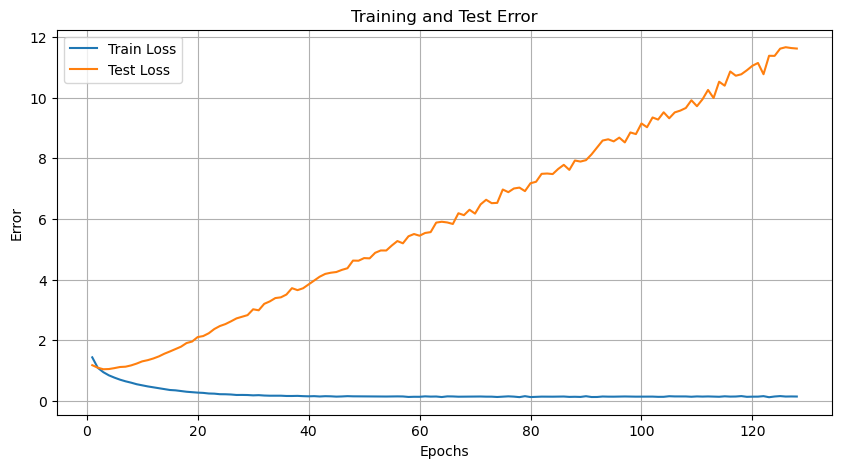

In [8]:
import matplotlib.pyplot as plt #匯入 Python 的 matplotlib繪圖套件來畫圖

#讀取 model.fit() 所產生的 history 資料
train_loss = history.history['loss']
val_loss = history.history['val_loss']


#繪製每週期的train error 以及 test error
epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Test Error')
plt.legend()
plt.grid()
plt.show()
